### Mtl Airbnb

![](airbnb1.jpg)

## 1. Data collection and analysis
### 1.1 Importing Libraries and Loading Data

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# import and display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',  None)
data_listings =pd.read_csv('listings.csv')
sub_montreal_listing =pd.read_csv('montreal_airbnb.csv')

## print the top 3 records
data_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2078,https://www.airbnb.com/rooms/2078,20200317175912,2020-03-18,Central comfy close to Metro Laurie,Centrally located in trendy Le Plateau. Join...,Centrally located clean comfy furnished room ...,Centrally located in trendy Le Plateau. Join...,none,Although my place is centrally located in Le P...,I always inform my guests the places/attractio...,I am 6-8 mins. walk to Metro Laurie and bus ro...,You will have full access in the apartment. I...,I am always available to help and give informa...,No house rules but I expect my guests to follo...,NaN,NaN,https://a0.muscache.com/im/pictures/88170231/0...,NaN,2277,https://www.airbnb.com/users/show/2277,Nelia,2008-08-19,"Montreal, Québec, Canada","Honest, quiet and adhere to the golden rules a...",within an hour,100%,0%,f,https://a0.muscache.com/im/users/2277/profile_...,https://a0.muscache.com/im/users/2277/profile_...,Le Plateau,1.0,1.0,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Montreal, QC, Canada",Le Plateau-Mont-Royal,Le Plateau-Mont-Royal,NaN,Montreal,QC,H2J 3E9,Montreal,"Montreal, Canada",CA,Canada,45.53069,-73.58588,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",NaN,$39.00,$190.00,NaN,$0.00,$0.00,1,$6.00,2,7,2,2,7,7,2.0,7.0,2 weeks ago,t,0,0,0,76,2020-03-18,245,0,2011-09-06,2018-09-23,93.0,10.0,9.0,10.0,10.0,10.0,10.0,f,NaN,"{Quebec,"" CA""}",t,f,flexible,f,f,1,0,1,0,2.36
1,2843,https://www.airbnb.com/rooms/2843,20200317175912,2020-03-18,Fabulous downtown/airport room,Come stay in this trendy area of downtown Mont...,"Private individual room in the downtown area, ...",Come stay in this trendy area of downtown Mont...,none,This area of St Henri is actually downtown Mon...,From this room you can walk to downtown Montre...,There is a major metro/subway stop called Lion...,"The guests can use the kitchen anytime, fully ...",I meet guests when they arrive show them the h...,No smoking and no pets Airport bus stops acros...,NaN,NaN,https://a0.muscache.com/im/pictures/397204dc-4...,NaN,2319,https://www.airbnb.com/users/show/2319,Gail,2008-08-19,"Montreal, Québec, Canada",Manage a network of downtown rooms and private...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/7c04e...,https://a0.muscac

In [112]:
# Print the shape of dataset with rows and columns
print(data_listings.shape)

(20176, 106)


In [76]:
# Print the informations of the dataset (type, count, non-Null Value, memory, ..., etc)
montreal_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17344 entries, 0 to 20174
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   host_neighbourhood  17344 non-null  object 
 1   longitude           17344 non-null  float64
 2   latitude            17344 non-null  float64
 3   neighbourhood       17344 non-null  object 
 4   property_type       17344 non-null  object 
 5   room_type           17344 non-null  object 
 6   accommodates        17344 non-null  int64  
 7   bathrooms           17344 non-null  float64
 8   bedrooms            17344 non-null  float64
 9   beds                17344 non-null  float64
 10  bed_type            17344 non-null  object 
 11  availability_365    17344 non-null  int64  
 12  price               17344 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 1.9+ MB


### 1.2 Analyzing and cleaning data

In [113]:
## Here we will check the percentage of NAN values present in each feature

## 1 - step make the list of features wich has missing values 
features_with_NAN = [features for features in data_listings.columns if data_listings[features].isnull().sum()>1]
 
## 2 - step print the feature name and the percentage of missing values
for feature in features_with_NAN:
    print(feature, np.round(data_listings[feature].isnull().mean()*100, 4),'% missing values')       

name 0.0892 % missing values
summary 4.7433 % missing values
space 33.292 % missing values
description 2.845 % missing values
neighborhood_overview 38.0749 % missing values
notes 64.1852 % missing values
transit 38.0799 % missing values
access 51.4324 % missing values
interaction 45.2716 % missing values
house_rules 43.9284 % missing values
thumbnail_url 100.0 % missing values
medium_url 100.0 % missing values
xl_picture_url 100.0 % missing values
host_name 0.0198 % missing values
host_since 0.0198 % missing values
host_location 0.109 % missing values
host_about 44.7958 % missing values
host_response_time 39.7998 % missing values
host_response_rate 39.7998 % missing values
host_acceptance_rate 27.8697 % missing values
host_is_superhost 0.0198 % missing values
host_thumbnail_url 0.0198 % missing values
host_picture_url 0.0198 % missing values
host_neighbourhood 13.3921 % missing values
host_listings_count 0.0198 % missing values
host_total_listings_count 0.0198 % missing values
host_has

In [78]:
features_cloumns = ['host_neighbourhood', 'longitude', 'latitude','neighbourhood', 'property_type', 'room_type','property_type','accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'availability_365', 'price'] 

montreal_listing = pd.DataFrame()
for feature in features_cloumns:
    montreal_listing[feature]= data_listings[feature]
    
# Print the informations of the dataset (type, count, non-Null Value, memory, ..., etc)
montreal_listing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20176 entries, 0 to 20175
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   host_neighbourhood  17474 non-null  object 
 1   longitude           20176 non-null  float64
 2   latitude            20176 non-null  float64
 3   neighbourhood       20133 non-null  object 
 4   property_type       20176 non-null  object 
 5   room_type           20176 non-null  object 
 6   accommodates        20176 non-null  int64  
 7   bathrooms           20151 non-null  float64
 8   bedrooms            20144 non-null  float64
 9   beds                20031 non-null  float64
 10  bed_type            20176 non-null  object 
 11  availability_365    20176 non-null  int64  
 12  price               20176 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 2.0+ MB


#### Delete NaN values

In [79]:
montreal_listing.isnull().sum()
montreal_listing.dropna(how='any',inplace=True)
montreal_listing.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17344 entries, 0 to 20174
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   host_neighbourhood  17344 non-null  object 
 1   longitude           17344 non-null  float64
 2   latitude            17344 non-null  float64
 3   neighbourhood       17344 non-null  object 
 4   property_type       17344 non-null  object 
 5   room_type           17344 non-null  object 
 6   accommodates        17344 non-null  int64  
 7   bathrooms           17344 non-null  float64
 8   bedrooms            17344 non-null  float64
 9   beds                17344 non-null  float64
 10  bed_type            17344 non-null  object 
 11  availability_365    17344 non-null  int64  
 12  price               17344 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 1.9+ MB


### 1.3 Explore and visualize data

In [80]:
montreal_listing.describe()

,longitude,latitude,accommodates,bathrooms,bedrooms,beds,availability_365
count,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000,17344.000000
mean,-73.588983,45.515912,3.609779,1.161122,1.431100,1.870618,104.203067
std,0.042079,0.030806,2.507591,0.546146,1.072144,1.574747,124.712639
min,-73.964380,45.404540,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-73.602482,45.498050,2.000000,1.000000,1.000000,1.000000,0.000000
50%,-73.579480,45.518980,3.000000,1.000000,1.000000,1.000000,47.000000
75%,-73.566007,45.533460,4.000000,1.000000,2.000000,2.000000,182.000000
max,-73.480770,45.700200,48.000000,20.000000,20.000000,50.000000,365.000000


###### Analyze the price in relation to the neighborhoods (neighborhood)

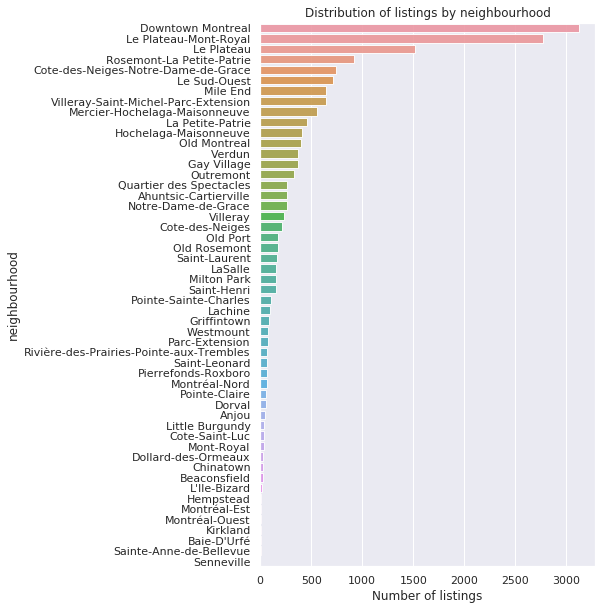

In [81]:
## Distribution of listings by neighbourhood
neighbourhood_count = montreal_listing['neighbourhood'].value_counts()
sns.set(style="darkgrid")
sns.barplot( neighbourhood_count.values, neighbourhood_count.index, label="neighbourhood", alpha=0.9)
fig = plt.gcf()
fig.set_size_inches(6,10)
plt.title('Distribution of listings by neighbourhood')
plt.xlabel('Number of listings', fontsize=12)
plt.ylabel('neighbourhood', fontsize=12) 
plt.show()

In [82]:
for neighbourhood in neighbourhood_count.index:
    print(neighbourhood)
    print(montreal_listing[montreal_listing['neighbourhood']==neighbourhood]['price'].describe())

Downtown Montreal
count       3123
unique       279
top       $49.00
freq         173
Name: price, dtype: object
Le Plateau-Mont-Royal
count        2772
unique        244
top       $100.00
freq          101
Name: price, dtype: object
Le Plateau
count        1512
unique        206
top       $100.00
freq           56
Name: price, dtype: object
Rosemont-La Petite-Patrie
count         923
unique        148
top       $100.00
freq           41
Name: price, dtype: object
Cote-des-Neiges-Notre-Dame-de-Grace
count        738
unique       141
top       $35.00
freq          36
Name: price, dtype: object
Le Sud-Ouest
count        710
unique       149
top       $30.00
freq          34
Name: price, dtype: object
Mile End
count        649
unique       145
top       $75.00
freq          32
Name: price, dtype: object
Villeray-Saint-Michel-Parc-Extension
count        644
unique       118
top       $45.00
freq          37
Name: price, dtype: object
Mercier-Hochelaga-Maisonneuve
count        561
unique   

In [83]:
#creating a sub-dataframe with no extreme values / less than 400 
montreal_listing = montreal_listing.copy()
montreal_listing['price'] = montreal_listing['price'].str.replace('$','')
montreal_listing['price'] = montreal_listing['price'].str.replace(',','')
montreal_listing['price'] = montreal_listing['price'].astype(float)

sub_montreal_listing=montreal_listing[montreal_listing.price < 400]
print('La tail de la base de données quand la valeur de prix d’une chambre / appartement est maximum égale 400 Dollars:', len(sub_montreal_listing))

pourcentage = round(100-((len(sub_montreal_listing)*100)/len(montreal_listing)),2)
print('Le pourcentage des annonces supprimés par rapport aux totale des annonces est:', pourcentage,'%')

La tail de la base de données quand la valeur de prix d’une chambre / appartement est maximum égale 400 Dollars: 16843
Le pourcentage des annonces supprimés par rapport aux totale des annonces est: 2.89 %


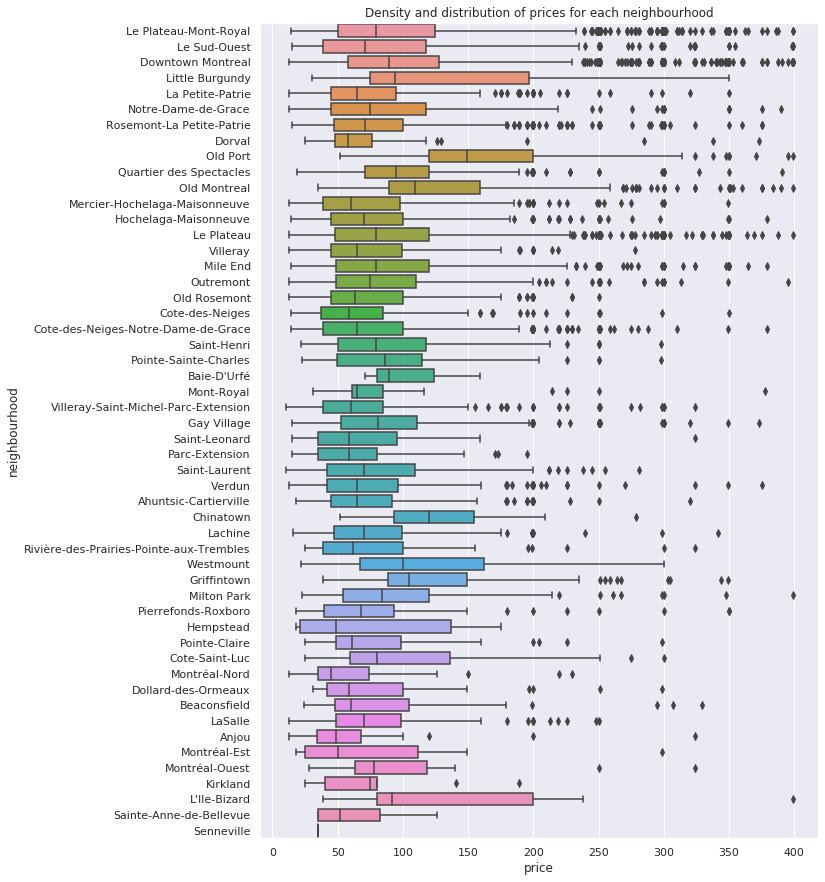

In [84]:
sns.boxplot('price', 'neighbourhood', data= sub_montreal_listing )
fig = plt.gcf()
fig.set_size_inches(10,15)
plt.title('Density and distribution of prices for each neighbourhood')
plt.xlabel('price', fontsize=12)
plt.ylabel('neighbourhood', fontsize=12) 
plt.show()

###### Analyze the density and distribution of listings in Montreal (Map)

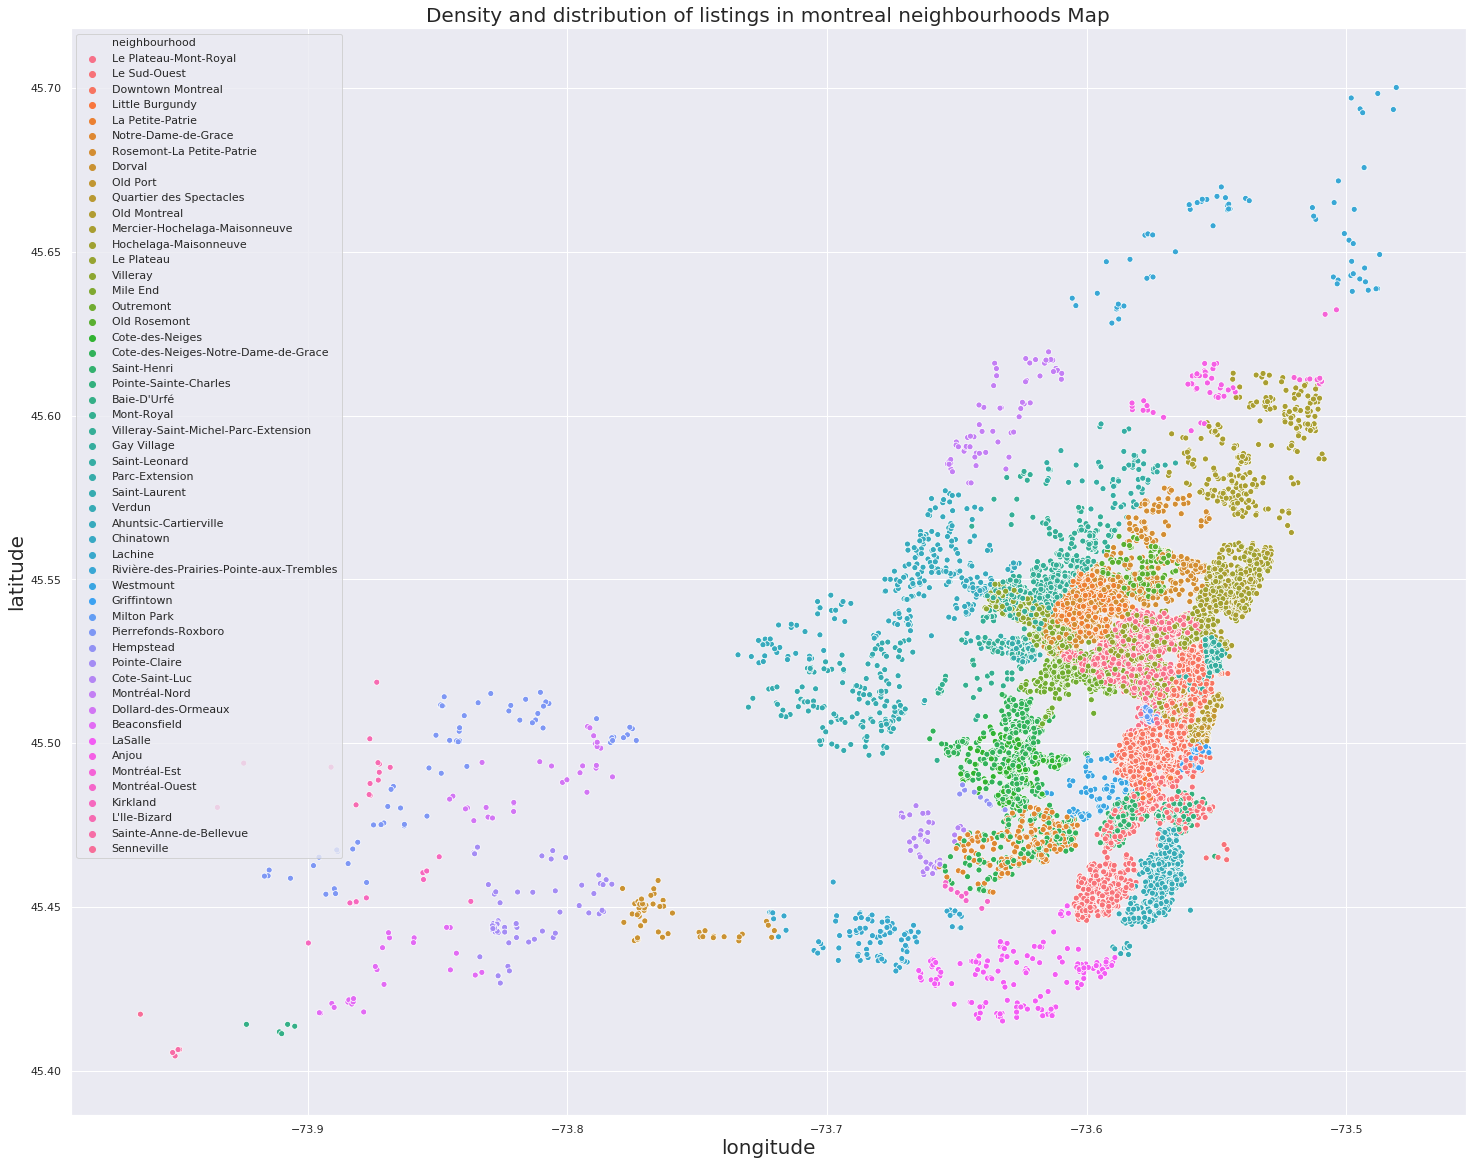

In [85]:
plt.figure(figsize=(25,20))
sns.scatterplot(montreal_listing.longitude,montreal_listing.latitude,hue=montreal_listing.neighbourhood)
plt.title('Density and distribution of listings in montreal neighbourhoods Map', fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20) 
plt.ioff()

###### Analyze the price

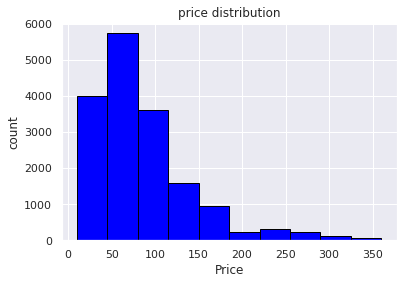

In [86]:
counts, bins = np.histogram(sub_montreal_listing.price)
plt.hist(bins[:-1], color = 'blue', edgecolor = 'black', weights=counts)
plt.title('price distribution')
plt.xlabel('Price')
plt.ylabel('count')
plt.show()

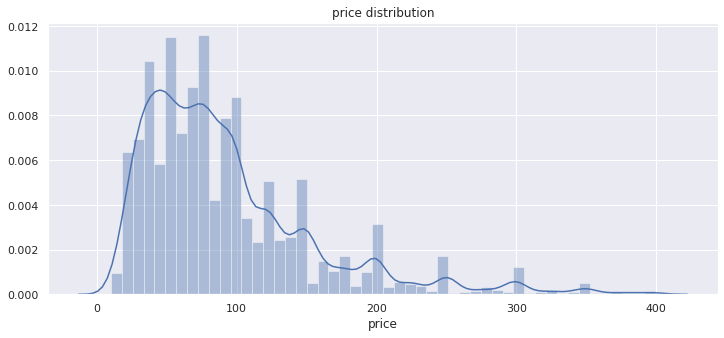

In [87]:
plt.figure(figsize=(12,5))
plt.title('price distribution')
plt.xlabel('Price')
ax = sns.distplot(sub_montreal_listing["price"], color = 'b')

###### Analyze the type of room

In [88]:
room_type_count = sub_montreal_listing['room_type'].value_counts()
print(room_type_count)

Entire home/apt    11914
Private room        4710
Shared room          164
Hotel room            55
Name: room_type, dtype: int64


In [89]:
room_type_category=list()
for feature in sub_montreal_listing['room_type']: 
    if feature == 'Entire home/apt':
        room_type_category.append(1)
    elif feature == 'Private room':
        room_type_category.append(2)
    elif feature == 'Shared room':
        room_type_category.append(3)    
    else:
        room_type_category.append(4)

sub_montreal_listing['room_type_category']=room_type_category
sub_montreal_listing['room_type_category'].value_counts()

1    11914
2     4710
3      164
4       55
Name: room_type_category, dtype: int64

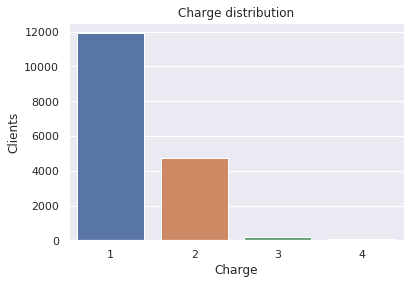

In [90]:
sns.countplot('room_type_category', data=sub_montreal_listing)
plt.title('Charge distribution')
plt.xlabel('Charge')
plt.ylabel('Clients')
plt.show()

"Private room" 

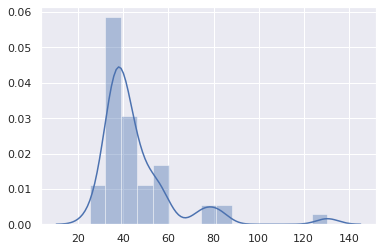

In [91]:
df_neighbourhood_price = sub_montreal_listing[sub_montreal_listing.room_type == "Private room"][["neighbourhood","price"]]
df_neighbourhood_price_grouped_median = df_neighbourhood_price.groupby("neighbourhood").median()
sns.distplot(df_neighbourhood_price_grouped_median)
plt.show()

In [92]:
# Median price values of Private room in each neighbourhood
df_neighbourhood_price_grouped_median

,price
neighbourhood,
Ahuntsic-Cartierville,40.0
Anjou,40.0
Beaconsfield,49.0
Chinatown,130.5
Cote-Saint-Luc,75.0
Cote-des-Neiges,35.0
Cote-des-Neiges-Notre-Dame-de-Grace,38.5
Dollard-des-Ormeaux,45.0
Dorval,54.0


'Entire home/apt'  

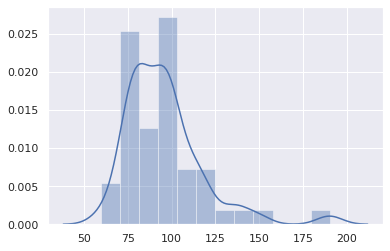

In [93]:
df_neighbourhood_price = sub_montreal_listing[sub_montreal_listing.room_type == "Entire home/apt"][["neighbourhood","price"]]
df_neighbourhood_price_grouped_median = df_neighbourhood_price.groupby("neighbourhood").median()
sns.distplot(df_neighbourhood_price_grouped_median)
plt.show()

'Shared room'

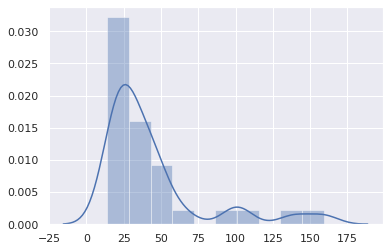

In [94]:
df_neighbourhood_price = sub_montreal_listing[sub_montreal_listing.room_type == "Shared room"][["neighbourhood","price"]]
df_neighbourhood_price_grouped_median = df_neighbourhood_price.groupby("neighbourhood").median()
sns.distplot(df_neighbourhood_price_grouped_median)
plt.show()

'Hotel room' 

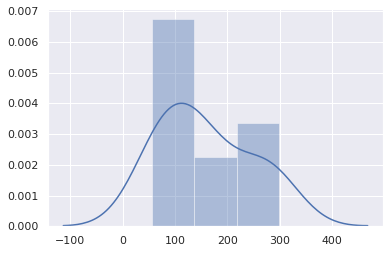

In [95]:
df_neighbourhood_price = sub_montreal_listing[sub_montreal_listing.room_type == "Hotel room"][["neighbourhood","price"]]
df_neighbourhood_price_grouped_median = df_neighbourhood_price.groupby("neighbourhood").median()
sns.distplot(df_neighbourhood_price_grouped_median)
plt.show()

In [96]:
# Median price values of Hotel room in each neighbourhood
df_neighbourhood_price_grouped_median

,price
neighbourhood,
Downtown Montreal,180.0
Gay Village,56.0
Hochelaga-Maisonneuve,267.0
Le Plateau,95.0
Le Plateau-Mont-Royal,131.0
Le Sud-Ouest,90.0
Mercier-Hochelaga-Maisonneuve,267.0
Notre-Dame-de-Grace,63.0
Old Montreal,167.5


###### Top 10 Airbnb Hosts (Most Popular)

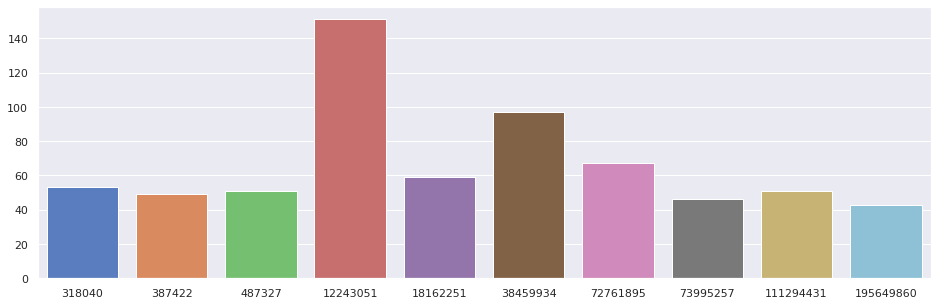

In [66]:
df1 = sub_montreal_listing.host_id.value_counts()[:10]
f,ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(x = df1.index,y=df1.values,palette="muted")
plt.show()

In [67]:
top_reviewed_listings=sub_montreal_listing[sub_montreal_listing.room_type == "Private room"].nlargest(10,'number_of_reviews')
price_avrg=top_reviewed_listings[sub_montreal_listing.room_type == "Private room"].price.median()
print('Average price per night for a Private room:',round(price_avrg,2),'$')

Average price per night for a Private room: 62.0 $


In [68]:
top_reviewed_listings=sub_montreal_listing[sub_montreal_listing.room_type == "Entire home/apt"].nlargest(10,'number_of_reviews')
price_avrg=top_reviewed_listings[sub_montreal_listing.room_type == "Entire home/apt"].price.median()
print('Average price per night for a Entire home/apt:',round(price_avrg,2),'$')

Average price per night for a Entire home/apt: 97.5 $


In [69]:
top_reviewed_listings=sub_montreal_listing[sub_montreal_listing.room_type == "Shared room"].nlargest(10,'number_of_reviews')
price_avrg=top_reviewed_listings[sub_montreal_listing.room_type == "Shared room"].price.median()
print('Average price per night for a Shared room:',round(price_avrg,2),'$')

Average price per night for a Shared room: 39.0 $


In [70]:
top_reviewed_listings=sub_montreal_listing[sub_montreal_listing.room_type == "Hotel room"].nlargest(10,'number_of_reviews')
price_avrg=top_reviewed_listings[sub_montreal_listing.room_type == "Hotel room"].price.median()
print('Average price per night for a Hotel room:',round(price_avrg,2),'$')

Average price per night for a Hotel room: 70.5 $


In [71]:
# calculate the correlation matrix
corr = sub_montreal_listing[['number_of_reviews','neighbourhood','calculated_host_listings_count', 'room_type', 'minimum_nights', 'availability_365', 'price']].corr()
#corr = sub_montreal_listing.corr()

cm = sns.light_palette("red", as_cmap=True)
s = corr.style.background_gradient(cmap=cm)
s

,number_of_reviews,calculated_host_listings_count,minimum_nights,availability_365,price
number_of_reviews,1.000000,0.036976,-0.025746,0.134109,-0.001182
calculated_host_listings_count,0.036976,1.000000,0.004938,0.163554,0.025292
minimum_nights,-0.025746,0.004938,1.000000,0.050654,0.009254
availability_365,0.134109,0.163554,0.050654,1.000000,0.099812
price,-0.001182,0.025292,0.009254,0.099812,1.000000


## 2. Features Engineering

In [97]:
# Encoding categorical features (proposed 1)

feature_sub_montreal_listing= sub_montreal_listing.copy()
categorical_features=['host_neighbourhood','property_type', 'neighbourhood','room_type', 'bed_type']

for feature in categorical_features:
    labels_ordered=feature_sub_montreal_listing.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    feature_sub_montreal_listing[feature]=feature_sub_montreal_listing[feature].map(labels_ordered)

feature_sub_montreal_listing.head(10)

,host_neighbourhood,longitude,latitude,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,availability_365,price,room_type_category
0,71,-73.58588,45.53069,37,13,1,2,1.0,1.0,1.0,3,76,39.0,2
1,89,-73.58001,45.48496,29,9,1,2,1.0,1.0,1.0,3,286,30.0,2
2,71,-73.57814,45.54135,37,17,2,4,1.0,1.0,1.0,3,342,175.0,1
3,73,-73.56482,45.51939,40,9,2,4,1.0,1.0,2.0,3,288,80.0,1
4,73,-73.56493,45.51929,40,13,2,5,1.0,2.0,2.0,3,297,145.0,1
5,89,-73.57995,45.48467,47,9,1,2,1.0,1.0,1.0,3,365,30.0,2
6,51,-73.60355,45.53840,12,9,2,5,1.0,2.0,3.0,3,269,140.0,1
7,71,-73.58342,45.52836,37,9,2,2,1.0,1.0,2.0,3,337,140.0,1
8,63,-73.55840,45.52699,40,9,1,1,1.0,3.0,4.0,3,365,49.0,2
9,89,-73.57939,45.48430,29,9,2,4,1.0,2.0,2.0,3,291,100.0,1


In [103]:
# Normalise Dataframe 
feature_scale=[feature for feature in feature_sub_montreal_listing.columns if feature not in ['price']]
data = pd.DataFrame()

for feature in feature_scale:
    data[feature] = (feature_sub_montreal_listing[feature] - feature_sub_montreal_listing[feature].mean())/ (feature_sub_montreal_listing[feature].std())

# transform the data, and add on the price variable
data.insert(loc=1, column='price', value=feature_sub_montreal_listing['price'])
feature_sub_montreal_listing = data.copy()

#Defining the independent variables and dependent variables
airbnb_en=feature_sub_montreal_listing.copy()
x = airbnb_en.drop(['price'], axis=1)

# use log10 for the price for a good result
y = airbnb_en['price'].values
y = np.log10(y)

#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

## 3. Prediction Model

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import * # importer tout les metrics d'erreurs


#Prepare a Linear Regression (LR) Model and Fitting model with trainig data
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,76.0,78.0
1,60.0,86.0
2,71.0,81.0
3,200.0,101.0
4,85.0,79.0
5,80.0,94.0
6,61.0,83.0
7,60.0,61.0
8,120.0,95.0
9,154.0,106.0


In [109]:
print('Results of the evaluation of our LR model with different Measures:')
print('R2 (score):',r2_score(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Median ABS Error:', median_absolute_error(y_test, y_pred))

Results of the evaluation of our LR model with different Measures:
R2 (score): 0.5197648717948156
MAE: 0.14877083282340328
MSE: 0.036488592366105195
RMSE: 0.19101987426994396
Median ABS Error: 0.12309343401663586


Analyze the prediction error rate in graphical form for the LR model

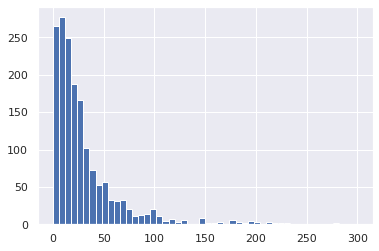

In [108]:
err_hist= np.abs(df['Actual'] - df['Predicted'])
plt.hist(err_hist, bins=50)
plt.show()